#### What is the effect of product layout on purchasing behaviour in sales ?

In [2]:
# Import libraries and dataset 
import pandas as pd

df = pd.read_excel('../QVI_results.xlsx')

df.info()
df.drop(columns=['MOIS'], inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   MOIS              1564 non-null    float64       
 2   STORE_NBR         264836 non-null  int64         
 3   LYLTY_CARD_NBR    264836 non-null  int64         
 4   LIFESTAGE         264836 non-null  object        
 5   PREMIUM_CUSTOMER  264836 non-null  object        
 6   TXN_ID            264836 non-null  int64         
 7   PROD_NBR          264836 non-null  int64         
 8   PROD_NAME         264836 non-null  object        
 9   BRAND             264836 non-null  object        
 10  SIZE              264836 non-null  object        
 11  PRODUCT           264836 non-null  object        
 12  PROD_QTY          264836 non-null  int64         
 13  TOT_SALES         264836 non-null  float64       
dtypes: d

In [28]:
df.shape

(264836, 13)

In [3]:
# Trial stores dataframe
trial_store = df[df['STORE_NBR'].isin([86, 86, 88])][['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TOT_SALES']]
trial_store.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TOT_SALES
69,2019-05-20,88,88320,9.2
202,2019-06-17,77,77069,8.4
1438,2019-03-28,77,77000,3.3
1439,2019-04-13,77,77000,3.0
1440,2018-07-17,77,2330211,2.3


In [12]:
## Monthly calculations on trial stores
# Group by store and month, then calculate metrics
trial_monthly_metrics = trial_store.groupby([
    'STORE_NBR', 
    pd.Grouper(key='DATE', freq='M')
]).agg({
    'TOT_SALES': 'sum',  # Monthly sales revenue
    'LYLTY_CARD_NBR': ['nunique', 'count']  # Unique customers and total transactions
}).reset_index()

# Rename columns for clarity
trial_monthly_metrics.columns = [
    'STORE_NBR', 
    'MONTH', 
    'TOTAL_SALES', 
    'NUM_CUSTOMERS',
    'NUM_TRANSACTIONS'
]

# Calculate transactions per customer
trial_monthly_metrics['TRANS_PER_CUSTOMER'] = trial_monthly_metrics['NUM_TRANSACTIONS'] / trial_monthly_metrics['NUM_CUSTOMERS']

# Sort by store and month
trial_monthly_metrics = trial_monthly_metrics.sort_values(['STORE_NBR', 'MONTH'])

print("Monthly metrics by store:")
print(trial_monthly_metrics)


Monthly metrics by store:
    STORE_NBR      MONTH  TOTAL_SALES  NUM_CUSTOMERS  NUM_TRANSACTIONS  \
0          77 2018-07-31       296.80             51                55   
1          77 2018-08-31       255.50             47                48   
2          77 2018-09-30       225.20             42                44   
3          77 2018-10-31       204.50             37                38   
4          77 2018-11-30       245.30             41                44   
5          77 2018-12-31       267.30             46                49   
6          77 2019-01-31       204.40             35                39   
7          77 2019-02-28       235.00             45                45   
8          77 2019-03-31       278.50             50                55   
9          77 2019-04-30       263.50             47                48   
10         77 2019-05-31       299.30             55                56   
11         77 2019-06-30       264.70             41                42   
12         8

C:\Users\PC\AppData\Local\Temp\ipykernel_17720\148765488.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='DATE', freq='M')


In [14]:
# Get control stores (all stores except trial stores)
control_stores = df[~df['STORE_NBR'].isin([77, 86, 88])][['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TOT_SALES']]

# Group by store and month, calculate same metrics
control_monthly_metrics = control_stores.groupby([
    'STORE_NBR',
    pd.Grouper(key='DATE', freq='M')
]).agg({
    'TOT_SALES': 'sum',
    'LYLTY_CARD_NBR': ['nunique', 'count']
}).reset_index()

# Rename columns to match trial metrics
control_monthly_metrics.columns = [
    'STORE_NBR',
    'MONTH', 
    'TOTAL_SALES',
    'NUM_CUSTOMERS',
    'NUM_TRANSACTIONS'
]

# Calculate transactions per customer
control_monthly_metrics['TRANS_PER_CUSTOMER'] = control_monthly_metrics['NUM_TRANSACTIONS'] / control_monthly_metrics['NUM_CUSTOMERS']

# Get min and max dates from dataset
date_range = pd.date_range(start=df['DATE'].min(), end=df['DATE'].max(), freq='M')

# Filter for stores that make sales for all months (condition given by stakeholder)
store_counts = control_monthly_metrics.groupby('STORE_NBR').size()
complete_stores = store_counts[store_counts == len(date_range)].index

control_monthly_metrics = control_monthly_metrics[
    control_monthly_metrics['STORE_NBR'].isin(complete_stores)
].sort_values(['STORE_NBR', 'MONTH'])


print("\nMonthly metrics for control stores :")
print(control_monthly_metrics)



Monthly metrics for control stores :
      STORE_NBR      MONTH  TOTAL_SALES  NUM_CUSTOMERS  NUM_TRANSACTIONS  \
0             1 2018-07-31        206.9             49                52   
1             1 2018-08-31        176.1             42                43   
2             1 2018-09-30        278.8             59                62   
3             1 2018-10-31        188.1             44                45   
4             1 2018-11-30        192.6             46                47   
...         ...        ...          ...            ...               ...   
3128        272 2019-02-28        395.5             45                48   
3129        272 2019-03-31        442.3             50                53   
3130        272 2019-04-30        445.1             54                56   
3131        272 2019-05-31        314.6             34                40   
3132        272 2019-06-30        312.1             34                37   

      TRANS_PER_CUSTOMER  
0               1.0612

C:\Users\PC\AppData\Local\Temp\ipykernel_17720\1541217121.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='DATE', freq='M')
C:\Users\PC\AppData\Local\Temp\ipykernel_17720\1541217121.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=df['DATE'].min(), end=df['DATE'].max(), freq='M')


In [56]:
# Selecting data before the trial period for correlation calculation (i.e <= 31/01/2019)
corr_control_stores = control_monthly_metrics[["STORE_NBR","MONTH","TOTAL_SALES"]][control_monthly_metrics["MONTH"] <= "31/01/2019"].reset_index()
corr_trial_stores   = trial_monthly_metrics[["STORE_NBR","MONTH","TOTAL_SALES"]][control_monthly_metrics["MONTH"] <= "31/01/2019"].reset_index()

C:\Users\PC\AppData\Local\Temp\ipykernel_17720\3204858389.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr_trial_stores   = trial_monthly_metrics[["STORE_NBR","MONTH","TOTAL_SALES"]][control_monthly_metrics["MONTH"] <= "31/01/2019"].reset_index()


In [69]:
# Correlation matrix calculation

import numpy as np
trial_store_nbr = list(corr_trial_stores["STORE_NBR"].unique())
control_store_nbr = list(corr_control_stores["STORE_NBR"].unique())

corr_matrix = pd.DataFrame(np.zeros((len(trial_store_nbr), len(control_store_nbr))),index=trial_store_nbr)
print(f"Correlation matrix shape: {corr_matrix.shape}")

for i, trial_n in enumerate(trial_store_nbr):
    trial_sales = corr_trial_stores[corr_trial_stores['STORE_NBR'] == trial_n]['TOTAL_SALES']
    
    for j, ctrl_n in enumerate(control_store_nbr):
        control_sales = corr_control_stores[corr_control_stores['STORE_NBR'] == ctrl_n]['TOTAL_SALES']
        correlation = np.corrcoef(trial_sales,control_sales)[0,1]
        corr_matrix.iloc[i,j] = correlation

print("\nCorrelation matrix:")
print(corr_matrix)
        

Correlation matrix shape: (3, 257)

Correlation matrix:
         0         1         2         3         4         5         6    \
77  0.075218 -0.263079  0.806644 -0.263300 -0.110652  0.042490 -0.193886   
86  0.445632 -0.403835 -0.261284 -0.039035  0.235159  0.721892  0.164099   
88  0.813636 -0.067927 -0.507847 -0.745566  0.190330  0.233396  0.649657   

         7         8         9    ...       247       248       249       250  \
77 -0.307360 -0.702976 -0.040008  ...  0.293075  0.393836  0.639759 -0.539746   
86 -0.177148  0.097854  0.351600  ...  0.119990 -0.466108 -0.171820 -0.057880   
88 -0.816296  0.073795  0.570248  ... -0.273969 -0.555570 -0.169623 -0.074078   

         251       252       253       254       255       256  
77 -0.470514  0.344757 -0.315730  0.315430  0.355487  0.117622  
86 -0.112351 -0.452182  0.697055 -0.730679  0.527637  0.004926  
88  0.111606 -0.021429 -0.172578 -0.723272 -0.103037 -0.772772  

[3 rows x 257 columns]


In [84]:
# Transposing corr_matrix to filter on trial stores

#corr_matrix = corr_matrix.transpose()

# casting str to trial store numbers to avoid confusion when performing filtering
corr_matrix.columns = [str(x) for x in corr_matrix.columns]

In [93]:
# Select most correlated control store to each trial store + heatmap visualisation
corr_matrix77 = corr_matrix["77"][corr_matrix["77"] > 0.8]
corr_matrix86 = corr_matrix["86"][corr_matrix["86"] > 0.8]
corr_matrix88 = corr_matrix["88"][corr_matrix["88"] > 0.8]

print("Potential control stores to trial store no : 77")
print(corr_matrix77)
print("\n")

print("Potential control stores to trial store no : 86")
print(corr_matrix86)
print("\n")

print("Potential control stores to trial store no : 88")
print(corr_matrix88)
print("\n")

Potential control stores to trial store no : 77
2      0.806644
15     0.842668
67     0.914106
108    0.867664
218    0.903774
Name: 77, dtype: float64


Potential control stores to trial store no : 86
121    0.846517
144    0.877882
225    0.825066
Name: 86, dtype: float64


Potential control stores to trial store no : 88
0      0.813636
123    0.864293
148    0.903186
192    0.885774
237    0.811838
Name: 88, dtype: float64




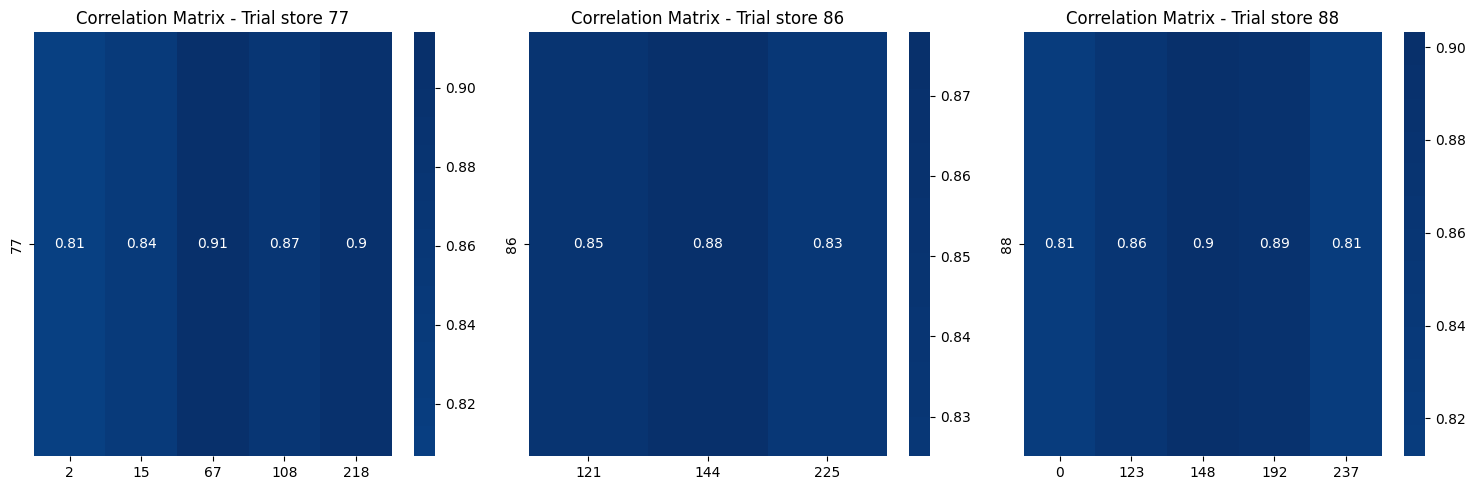

In [97]:
# Drawing heatmaps to each correlation matrix
# Create figure with 3 subplots
plt.figure(figsize=(15, 5))

# Heatmap for store 77
plt.subplot(131)
sns.heatmap(pd.DataFrame(corr_matrix77).T, annot=True, cmap='Blues', center=0)
plt.title('Correlation Matrix - Trial store 77')

# Heatmap for store 86 
plt.subplot(132)
sns.heatmap(pd.DataFrame(corr_matrix86).T, annot=True, cmap='Blues', center=0)
plt.title('Correlation Matrix - Trial store 86')

# Heatmap for store 88
plt.subplot(133)
sns.heatmap(pd.DataFrame(corr_matrix88).T, annot=True, cmap='Blues', center=0)
plt.title('Correlation Matrix - Trial store 88')

plt.tight_layout()
plt.show()


Next step, assess driver of change

Did the number of customers (NUM_CUSTOMERS) drive the change ? Then the product layout didn't affect the sales 

Did the number of tx per customers (TRANS_PER_CUSTOMER)  drive the change ? Then the product layout did affect the sales

I'll probaly use a Z-test.

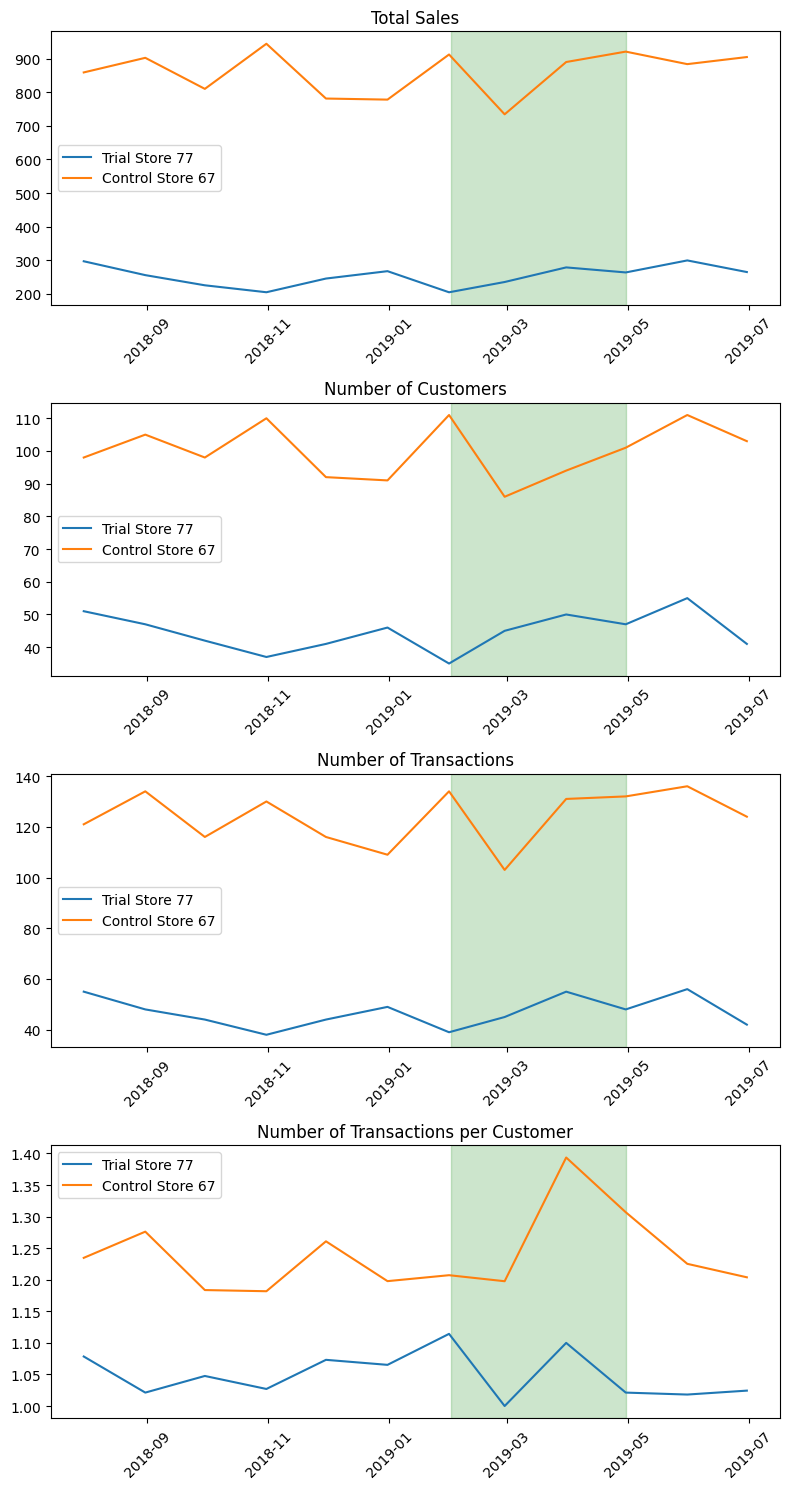

In [157]:


## Control stores selected for each trial store : 
# Trial store 77 : control store 67
plt.figure(figsize=(8,15))

# Plot total sales
plt.subplot(411)
plt.plot(trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 77]["MONTH"], 
         trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 77]["TOTAL_SALES"],
         label='Trial Store 77')
plt.plot(control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 67]["MONTH"],
         control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 67]["TOTAL_SALES"], 
         label='Control Store 67')

# Add trial period shading
plt.axvspan('2019-02-01', '2019-04-30', color='green', alpha=0.2)
plt.title('Total Sales')
plt.legend()
plt.xticks(rotation=45)

# Plot number of customers
plt.subplot(412)
plt.plot(trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 77]["MONTH"],
         trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 77]["NUM_CUSTOMERS"],
         label='Trial Store 77')
plt.plot(control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 67]["MONTH"],
         control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 67]["NUM_CUSTOMERS"],
         label='Control Store 67')

# Add trial period shading
plt.axvspan('2019-02-01', '2019-04-30', color='green', alpha=0.2)
plt.title('Number of Customers')
plt.legend()
plt.xticks(rotation=45)

# Plot number of tx 
plt.subplot(413)
plt.plot(trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 77]["MONTH"],
         trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 77]["NUM_TRANSACTIONS"],
         label='Trial Store 77 ')
plt.plot(control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 67]["MONTH"],
         control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 67]["NUM_TRANSACTIONS"],
         label='Control Store 67')

# Add trial period shading
plt.axvspan('2019-02-01', '2019-04-30', color='green', alpha=0.2)
plt.title('Number of Transactions')
plt.legend()
plt.xticks(rotation=45)

# Plot number of tx per customers
plt.subplot(414)
plt.plot(trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 77]["MONTH"],
         trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 77]["TRANS_PER_CUSTOMER"],
         label='Trial Store 77')
plt.plot(control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 67]["MONTH"],
         control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 67]["TRANS_PER_CUSTOMER"],
         label='Control Store 67')

# Add trial period shading
plt.axvspan('2019-02-01', '2019-04-30', color='green', alpha=0.2)
plt.title('Number of Transactions per Customer')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





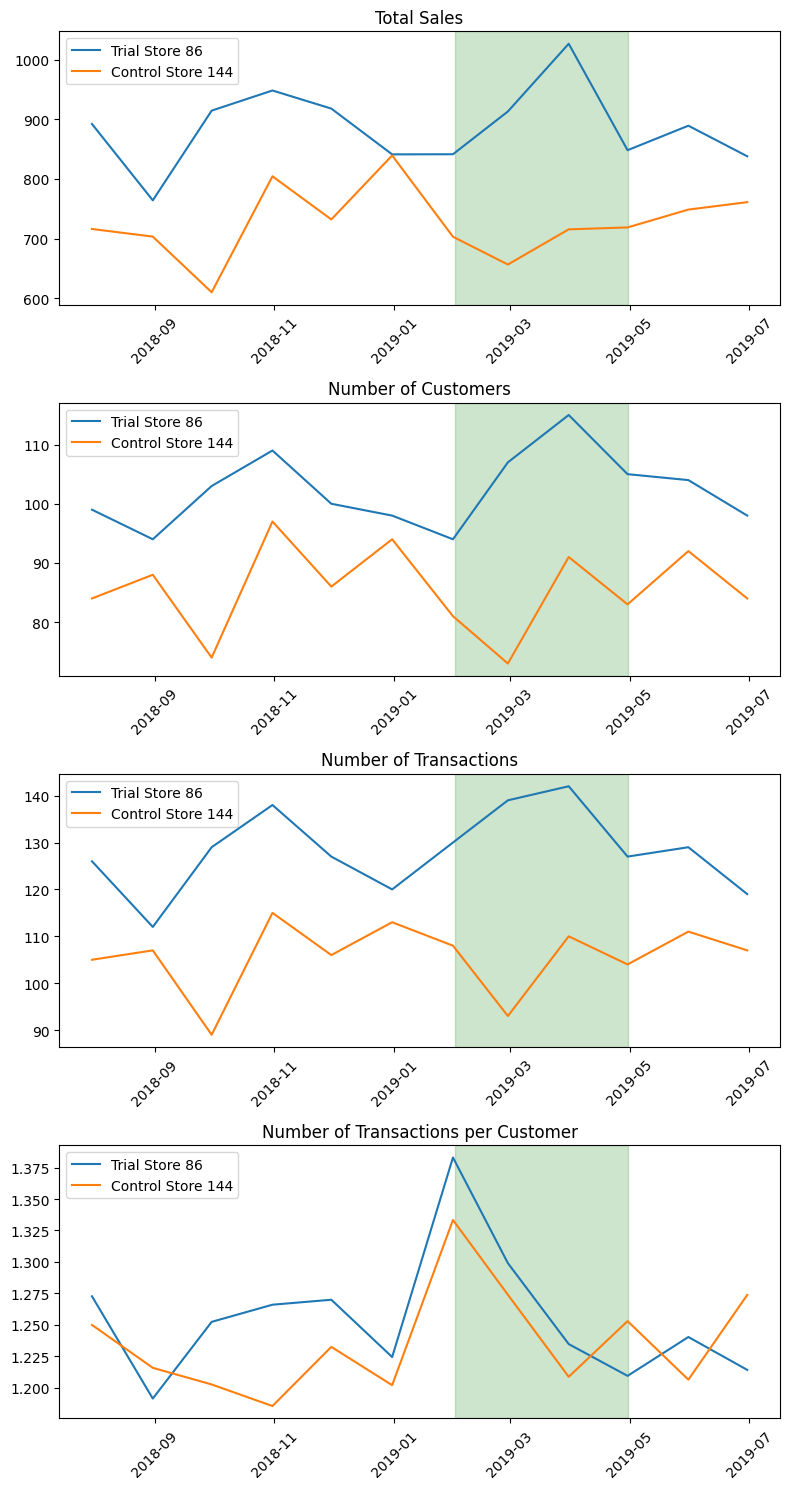

In [156]:
# Trial store 86 : control store 144

plt.figure(figsize=(8,15))

# Plot total sales
plt.subplot(411)
plt.plot(trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 86]["MONTH"], 
         trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 86]["TOTAL_SALES"],
         label='Trial Store 86')
plt.plot(control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 144]["MONTH"],
         control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 144]["TOTAL_SALES"], 
         label='Control Store 144')

# Add trial period shading
plt.axvspan('2019-02-01', '2019-04-30', color='green', alpha=0.2)
plt.title('Total Sales')
plt.legend()
plt.xticks(rotation=45)

# Plot number of customers
plt.subplot(412)
plt.plot(trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 86]["MONTH"],
         trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 86]["NUM_CUSTOMERS"],
         label='Trial Store 86')
plt.plot(control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 144]["MONTH"],
         control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 144]["NUM_CUSTOMERS"],
         label='Control Store 144')

# Add trial period shading
plt.axvspan('2019-02-01', '2019-04-30', color='green', alpha=0.2)
plt.title('Number of Customers')
plt.legend()
plt.xticks(rotation=45)

# Plot number of tx 
plt.subplot(413)
plt.plot(trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 86]["MONTH"],
         trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 86]["NUM_TRANSACTIONS"],
         label='Trial Store 86 ')
plt.plot(control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 144]["MONTH"],
         control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 144]["NUM_TRANSACTIONS"],
         label='Control Store 144')

# Add trial period shading
plt.axvspan('2019-02-01', '2019-04-30', color='green', alpha=0.2)
plt.title('Number of Transactions')
plt.legend()
plt.xticks(rotation=45)

# Plot number of tx per customers
plt.subplot(414)
plt.plot(trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 86]["MONTH"],
         trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 86]["TRANS_PER_CUSTOMER"],
         label='Trial Store 86')
plt.plot(control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 144]["MONTH"],
         control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 144]["TRANS_PER_CUSTOMER"],
         label='Control Store 144')

# Add trial period shading
plt.axvspan('2019-02-01', '2019-04-30', color='green', alpha=0.2)
plt.title('Number of Transactions per Customer')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

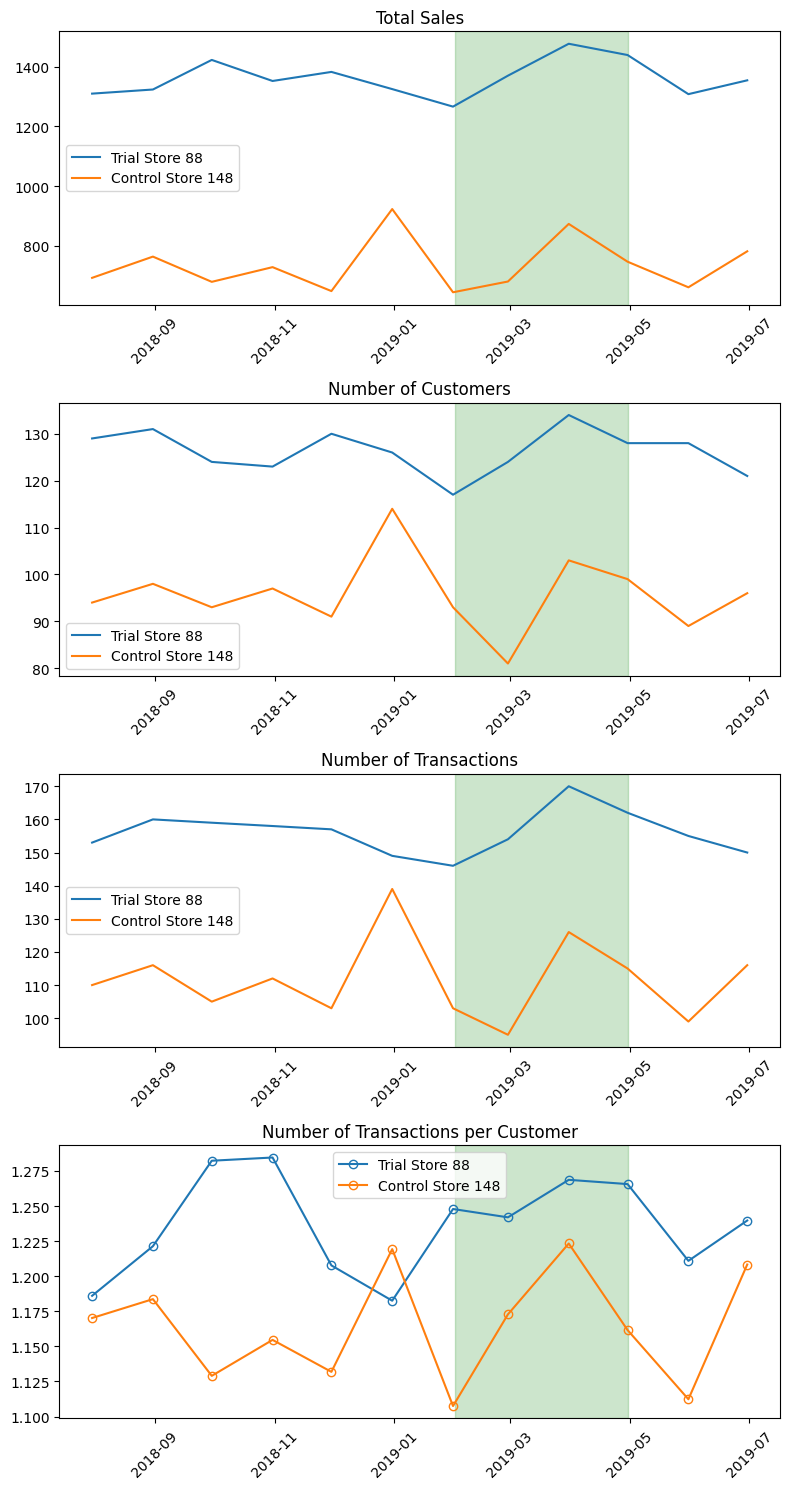

In [155]:
# Trial store 88 : control store 148
plt.figure(figsize=(8,15))

# Plot total sales
plt.subplot(411)
plt.plot(trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 88]["MONTH"], 
         trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 88]["TOTAL_SALES"],
         label='Trial Store 88')
plt.plot(control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 148]["MONTH"],
         control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 148]["TOTAL_SALES"], 
         label='Control Store 148')

# Add trial period shading
plt.axvspan('2019-02-01', '2019-04-30', color='green', alpha=0.2)
plt.title('Total Sales')
plt.legend()
plt.xticks(rotation=45)

# Plot number of customers
plt.subplot(412)
plt.plot(trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 88]["MONTH"],
         trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 88]["NUM_CUSTOMERS"],
         label='Trial Store 88')
plt.plot(control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 148]["MONTH"],
         control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 148]["NUM_CUSTOMERS"],
         label='Control Store 148')

# Add trial period shading
plt.axvspan('2019-02-01', '2019-04-30', color='green', alpha=0.2)
plt.title('Number of Customers')
plt.legend()
plt.xticks(rotation=45)

# Plot number of tx 
plt.subplot(413)
plt.plot(trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 88]["MONTH"],
         trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 88]["NUM_TRANSACTIONS"],
         label='Trial Store 88 ')
plt.plot(control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 148]["MONTH"],
         control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 148]["NUM_TRANSACTIONS"],
         label='Control Store 148')

# Add trial period shading
plt.axvspan('2019-02-01', '2019-04-30', color='green', alpha=0.2)
plt.title('Number of Transactions')
plt.legend()
plt.xticks(rotation=45)

# Plot number of tx per customers
plt.subplot(414)
plt.plot(trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 88]["MONTH"],
         trial_monthly_metrics[trial_monthly_metrics["STORE_NBR"] == 88]["TRANS_PER_CUSTOMER"], marker = 'o', fillstyle = 'none',
         label='Trial Store 88 ')
plt.plot(control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 148]["MONTH"],
         control_monthly_metrics[control_monthly_metrics["STORE_NBR"] == 148]["TRANS_PER_CUSTOMER"], marker = 'o', fillstyle = 'none',
         label='Control Store 148')

# Add trial period shading
plt.axvspan('2019-02-01', '2019-04-30', color='green', alpha=0.2)
plt.title('Number of Transactions per Customer')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [181]:
def pct_change(monthly_metrics, store_nbr,kpi):
    #before = trial_monthly_metrics[(trial_monthly_metrics["STORE_NBR"] == 77) & (trial_monthly_metrics["MONTH"] <= "31/01/2019")][["TOTAL_SALES","MONTH"]].mean()
    #during = trial_monthly_metrics[(trial_monthly_metrics["STORE_NBR"] == 77) & (trial_monthly_metrics["MONTH"] > "31/01/2019") & (trial_monthly_metrics["MONTH"] <= "30/04/2019")][["TOTAL_SALES","MONTH"]].mean()
    before = monthly_metrics[(monthly_metrics["STORE_NBR"] == store_nbr) & (monthly_metrics["MONTH"] <= "31/01/2019")][kpi].mean()
    during = monthly_metrics[(monthly_metrics["STORE_NBR"] == store_nbr) & (monthly_metrics["MONTH"] > "31/01/2019") & (monthly_metrics["MONTH"] <= "30/04/2019")][kpi].mean()
    return (during - before) / during * 100

# measure pct change : trial 88 vs control 148
print("Sales percentage change comparison : trial 88 vs control 148")
print("Trial : ",pct_change(trial_monthly_metrics, 88, "TOTAL_SALES"))
print("Control : ",pct_change(control_monthly_metrics,148,"TOTAL_SALES"))
print("\n")

# measure pct change : trial 86 vs control 144
print("Sales percentage change comparison : trial 86 vs control 144")
print("Trial : ",pct_change(trial_monthly_metrics, 86, "TOTAL_SALES"))
print("Control : ",pct_change(control_monthly_metrics,144,"TOTAL_SALES"))
print("\n")

# measure pct change : trial 77 vs control 67
print("Sales percentage change comparison : trial 77 vs control 67")
print("Trial : ",pct_change(trial_monthly_metrics, 77, "TOTAL_SALES"))
print("Control : ", pct_change(control_monthly_metrics,67,"TOTAL_SALES"))
print("\n")







Sales percentage change comparison : trial 88 vs control 148
Trial :  6.187765766005947
Control :  5.365762743453554


Sales percentage change comparison : trial 86 vs control 144
Trial :  5.932398782624743
Control :  -4.719534197146131


Sales percentage change comparison : trial 77 vs control 67
Trial :  6.287920573634856
Control :  -0.8196445401911874




# Insights 

We  have to apply a z-test on the pct_change for each KPI 
to determine if the difference is statistically significant or not
Visually, I conjecture that statistical significance is present in stores 88's sales


- For store 88 : the product layout did affect sales (increase in number of transactions per customer)
- For store 77 : the product layout didn't affect sales (no increase in sales at all) 
- For store 86 : the product layout didn't affect sales (number of customer increased, not tx per customer, and product layout can't have an effect on number of customers)

Other things to take into account :
- Sales seasonality